AUC score for svc:0.93
AUC score for rf:0.87


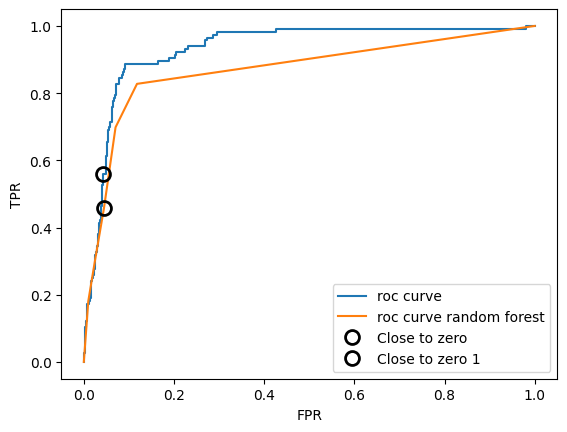

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

svc = SVC(gamma=0.05).fit(X_train, y_train)
rf = RandomForestClassifier(n_estimators=5, random_state=1).fit(X_train, y_train)

fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
fpr1, tpr1, thresholds1 = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

auc_svc = roc_auc_score(y_test, svc.decision_function(X_test))
auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label='roc curve')
plt.plot(fpr1, tpr1, label='roc curve random forest')
plt.xlabel("FPR")
plt.ylabel("TPR")

close_zero = np.argmin(np.abs(thresholds))
close_zero1 = np.argmin(np.abs(thresholds1-0.5))

plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, fillstyle='none', c='k', mew=2, label="Close to zero")
plt.plot(fpr1[close_zero1], tpr1[close_zero1], 'o', markersize=10, fillstyle='none', c='k', mew=2, label="Close to zero 1")

plt.legend(loc=4)
print("AUC score for svc:{:.2f}".format(auc_svc))
print("AUC score for rf:{:.2f}".format(auc_rf))

Accuracy:0.89 AUC:0.50 gamma:1
Accuracy:0.89 AUC:1.00 gamma:0.05
Accuracy:0.89 AUC:0.96 gamma:0.1


Text(0.5, 1.0, 'ROC curve for svc model')

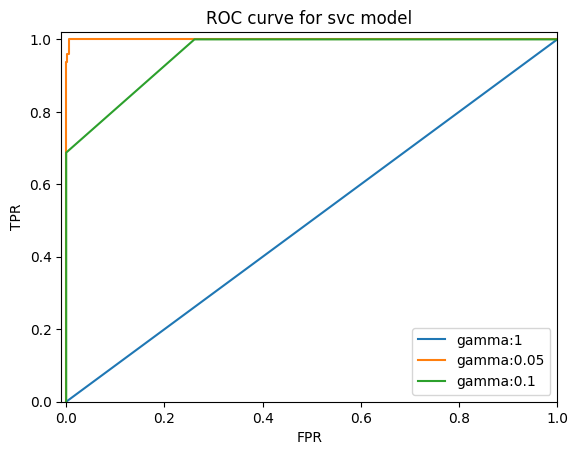

In [16]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve

digits = load_digits()
y = digits.target== 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=1)

for gamma in [1, 0.05, 0.1]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, threshold = roc_curve(y_test, svc.decision_function(X_test))
    print("Accuracy:{:.2f} AUC:{:.2f} gamma:{}".format(accuracy, auc, gamma))
    plt.plot(fpr, tpr, label="gamma:{}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")
plt.title("ROC curve for svc model")